Import

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [2]:
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
lr = LogisticRegression(random_state=48,solver="liblinear")
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


Split the data into training and testing sets

Train the Logistic Regression model

Calculate the accuracy of the model

In [5]:
def accurracy(y_true,y_pred_test):
    return np.sum(y_true==y_pred_test)/len(y_true)
print('Accuracy  classification :',accurracy(y_test,y_pred_test))


Accuracy  classification : 0.7


Calculate the classification report of the model

classification_report 
               precision    recall  f1-score   support

         bot       0.74      0.69      0.71      3447
       human       0.85      0.87      0.86      6767

    accuracy                           0.81     10214
   macro avg       0.79      0.78      0.79     10214
weighted avg       0.81      0.81      0.81     10214




Training Accuracy score: 0.7089772727272727
Testing Accuracy score: 0.7
classification_report 
               precision    recall  f1-score   support

           0       0.63      0.94      0.75      2158
           1       0.89      0.47      0.62      2242

    accuracy                           0.70      4400
   macro avg       0.76      0.70      0.68      4400
weighted avg       0.76      0.70      0.68      4400



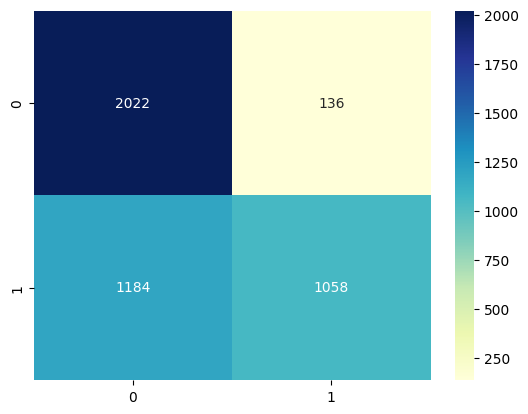

In [6]:
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


result

with StandardScaler et dimensionality reduction techniques.

Accuracy: 82.24%

Training Accuracy score: 0.8164704059497986
Testing Accuracy score: 0.8224356987914472
DecisionTreeClassifier score: 0.8164704059497986
classification_report 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      2309
           1       0.85      0.88      0.86      4145

    accuracy                           0.82      6454
   macro avg       0.81      0.80      0.80      6454
weighted avg       0.82      0.82      0.82      6454



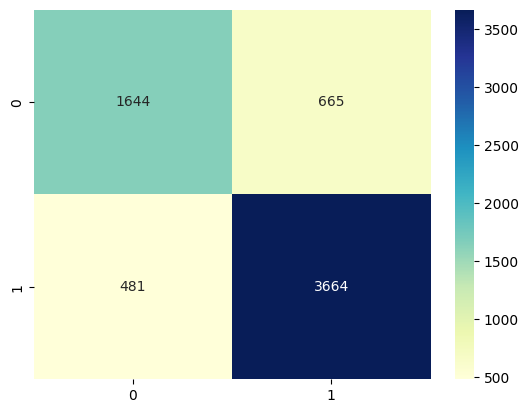

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+descvf.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', LogisticRegression(solver="liblinear")) # Training a random forest classifier on the data
])

pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# hyperparametre


In [ ]:
from sklearn.model_selection import GridSearchCV
# Creating lists of parameter for LogisticRegression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(estimator = LogisticRegression(), param_grid=param_grid, cv = 3)

# Fitting the grid search
clf_GS.fit(x, y)

clf_GS.best_params_

#  cross validation

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE

df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf=LogisticRegression()
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())